#### Import libraries

In [2]:
import pandas as pd
import os

#### Merging yearly csv files into one file

In [3]:

files = [file for file in os.listdir("./Sales_Data")]

all_file_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_file_data = pd.concat([all_file_data,df])
    
all_file_data.to_csv("all_file_data.csv", index=False)

####  load in concatenated file containing all 12 files

In [4]:
df = pd.read_csv("all_file_data.csv")

#### Cleaning

#### Removing NaN values

In [5]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Removing other strange values

In [6]:
df = df[df["Order Date"].str[0:2] != "Or"]

#### Convert Column types to integers

In [7]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])


#### Create Month column using Order Date column

In [8]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### add a sales column, quantity ordered x price each

In [9]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### 1. What was the best month for sales? how much was earned?

In [18]:
results = df.groupby("Month").sum()
results

TypeError: 'DataFrame' object is not callable

#### Display results in graph using matplotlib

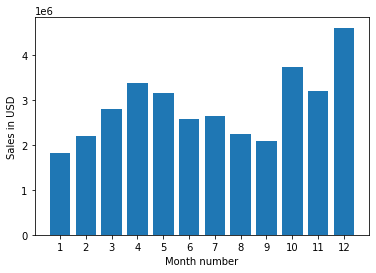

In [16]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month number")
plt.show()
